The [Heliophysics Application Programmer’s Interface (HAPI)](http://hapi-server.org/) data access specification is a RESTful API and streaming format specification for delivering digital time series data.

HAPI serves time series data in a mission-independent format as a single continous dataset (regardless of mission file formats or file boundaries) from any mission that has implemented a HAPI server.

The first part of this walkthrough has 5 parts:
* [HAPI_01.ipynb - First look at HAPI](HAPI_01.ipynb)
* [HAPI_02.ipynb - Data structures](HAPI_02.ipynb)
* [HAPI_03.ipynb - Plotting, Pandas, and metadata](HAPI_03.ipynb) (this Notebook)
* [HAPI_04.ipynb - Data fusion using HAPI](HAPI_04.ipynb)
* [HAPI_05.ipynb - The HAPI ecosystem](HAPI_05.ipynb)

For more information on HAPI-related software, see http://hapi-server.org/.

In [ ]:
# Here we set up our Python environment for this Notebook
from hapiclient import hapi
from hapiplot import hapiplot
%matplotlib inline 
%config InlineBackend.figure_formats = ['svg']
# Show plots in page instead of opening a window
import warnings
warnings.simplefilter("ignore", ResourceWarning) # removes spurious Notebook warns

# Plotting with 'matplotlib' and 'pandas'
## MatplotLib
Users who prefer the 'plt' plot commands can access HAPI data, which again is simply numpy arrays.  Here is an example.

Text(0.5, 1.0, 'scalar with Time as datetimes')

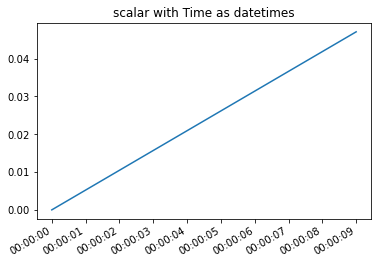

In [27]:
# Get data for use below
from hapiclient import hapi

import warnings
warnings.simplefilter("ignore",ResourceWarning)


server     = 'http://hapi-server.org/servers/TestData2.0/hapi'
dataset    = 'dataset1'
parameters = 'scalar'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data,meta = hapi(server,dataset,parameters,start,stop)

from matplotlib import pyplot as plt
from hapiclient import hapitime2datetime
%matplotlib inline

# Convert data['Time'] elements to Python datetime objects
# Note the difference in tick labels when datetimes are used
plt.figure()
plt.plot(hapitime2datetime(data['Time']),data['scalar'])
plt.gcf().autofmt_xdate()
plt.title('scalar with Time as datetimes')

## Pandas
Similarly, we can convert the HAPI numpy data to a Pandas DataFrame like we did earlier, then plot that with the 'df.plot()' approach.

,x,y,z
Time,,,
1970-01-01 00:00:00+00:00,0.000000,-0.707107,-1.000000
1970-01-01 00:00:01+00:00,0.005236,-0.703395,-0.999986
1970-01-01 00:00:02+00:00,0.010472,-0.699663,-0.999945
1970-01-01 00:00:03+00:00,0.015707,-0.695913,-0.999877
1970-01-01 00:00:04+00:00,0.020942,-0.692143,-0.999781
1970-01-01 00:00:05+00:00,0.026177,-0.688355,-0.999657
1970-01-01 00:00:06+00:00,0.031411,-0.684547,-0.999507
1970-01-01 00:00:07+00:00,0.036644,-0.680721,-0.999328
1970-01-01 00:00:08+00:00,0.041876,-0.676876,-0.999123


<AxesSubplot:xlabel='Time'>

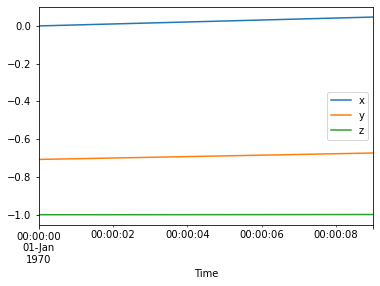

In [28]:
# Get data for use below
from hapiclient import hapi
from hapiclient import hapitime2datetime

server     = 'http://hapi-server.org/servers/TestData2.0/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data,meta = hapi(server,dataset,parameters,start,stop)

import pandas
# Create dataframe
df = pandas.DataFrame(data['vector'])

# Add column to DataFrame
df['Time'] = hapitime2datetime(data['Time'])

# Set index
df.set_index('Time', inplace=True)

# Rename columns
df.columns = ['x', 'y', 'z']

display(df)

%matplotlib inline
df.plot()

# Metadata

The metadata returned by `hapi()` is a straightforward mapping of the JSON metadata from a HAPI server.  Earlier we showed the metadata for a dataset; now we look at (a) creating a list of all HAPI servers and (b) asking any specific HAPI server which datasets it has available.

## Listing all Servers

HAPI has a query function to return all current HAPI servers, which is identical to the 
[Equivalent URL](https://github.com/hapi-server/data-specification/blob/master/servers.txt).

In [1]:
from hapiclient import hapi

servers = hapi() # servers is an array of URLs
display(servers)

['http://hapi-server.org/servers/SSCWeb/hapi',
 'http://datashop.elasticbeanstalk.com/hapi',
 'https://cdaweb.gsfc.nasa.gov/hapi',
 'http://planet.physics.uiowa.edu/das/das2Server/hapi',
 'https://iswa.gsfc.nasa.gov/IswaSystemWebApp/hapi',
 'http://lasp.colorado.edu/lisird/hapi',
 'http://hapi-server.org/servers/TestData2.0/hapi',
 'http://amda.irap.omp.eu/service/hapi',
 'https://vires.services/hapi']

## Server datasets

For a given server-- in this example, CDAWeb-- you can fetch the full list of dataset ids it serves. There is an [Equivalent URL: https://cdaweb.gsfc.nasa.gov/hapi/catalog](https://cdaweb.gsfc.nasa.gov/hapi/catalog) using the `catalog` endpoint (defined in the HAPI specification) that you can use as well.  Here, we only display the first five entries for example use, while a call to 'display(meta)' will display them all.

In [6]:
from hapiclient import hapi

server = 'https://cdaweb.gsfc.nasa.gov/hapi'
meta = hapi(server)

display(meta['catalog'][0:5])

[{'id': 'A1_K0_MPA'},
 {'id': 'A2_K0_MPA'},
 {'id': 'AC_AT_DEF'},
 {'id': 'AC_H0_MFI'},
 {'id': 'AC_H0_SWE'}]

## Dataset  parameters

Each dataset's metadata is available as a query, without needing to fetch the actual data, using the `info` endpoint. For this example, there is an [Equivalent URL: https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI](https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI)

In [31]:
from hapiclient import hapi

server  = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset = 'AC_H0_MFI'
meta = hapi(server,dataset)
display(meta)

{'HAPI': '2.0',
 'status': {'code': 1200, 'message': 'OK'},
 'parameters': [{'name': 'Time',
   'type': 'isotime',
   'units': 'UTC',
   'length': 24,
   'fill': None},
  {'name': 'Magnitude',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'B-field magnitude'},
  {'name': 'BGSEc',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'Magnetic Field Vector in GSE Cartesian coordinates (16 sec)',
   'size': [3]},
  {'name': 'BGSM',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'Magnetic field vector in GSM coordinates (16 sec)',
   'size': [3]},
  {'name': 'dBrms',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'RMS of Magnetic Field (16 sec period)'},
  {'name': 'SC_pos_GSE',
   'type': 'double',
   'units': 'km',
   'fill': '-1.0E31',
   'description': 'ACE s/c position, 3 comp. in GSE coord.',
   'size': [3]},
  {'name': 'SC_pos_GSM',
   'type': 'double',
   'unit

## Parameters

You can likewise examine a subset of the full dataset (rather than all variables returnable) by adding the same 'parameters' call you would use in a query.
[Equivalent URL: https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI&parameters=Magnitude,BGSEc](https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI&parameters=Magnitude,BGSEc)

(Note that HAPI allows 'unlisted' non-standard internal keys that prefixed by `x_`.  Similar to the Python `_name` scheme, this is an advanced feature not covered in this tutorial.)

Here we fetch just the `Magnitude` and `BGSEc` for the `AC_H0_MFI` dataset from `CDAWeb`.

In [32]:
from hapiclient import hapi

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_MFI'
parameters = 'Magnitude,BGSEc'

meta = hapi(server,dataset,parameters)

display(meta)

{'HAPI': '2.0',
 'status': {'code': 1200, 'message': 'OK'},
 'parameters': [{'name': 'Time',
   'type': 'isotime',
   'units': 'UTC',
   'length': 24,
   'fill': None},
  {'name': 'Magnitude',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'B-field magnitude'},
  {'name': 'BGSEc',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'Magnetic Field Vector in GSE Cartesian coordinates (16 sec)',
   'size': [3]}],
 'startDate': '1997-09-02T00:00:12Z',
 'stopDate': '2022-01-03T23:59:58Z',
 'resourceURL': 'https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#AC_H0_MFI',
 'contact': 'N. Ness @ Bartol Research Institute',
 'x_server': 'https://cdaweb.gsfc.nasa.gov/hapi',
 'x_dataset': 'AC_H0_MFI'}

----
Next up, [data fusion](HAPI_04.ipynb)
----